In [57]:
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np
from time import time
from time import sleep
import scipy

Working with 6 images
Image examples: 
1_AB001r.jpg


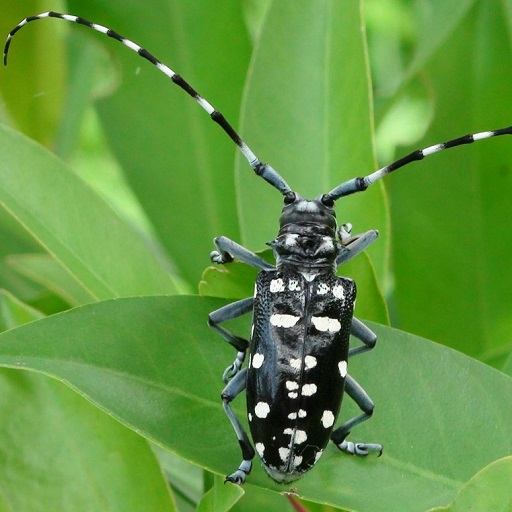

1_AB002.jpg


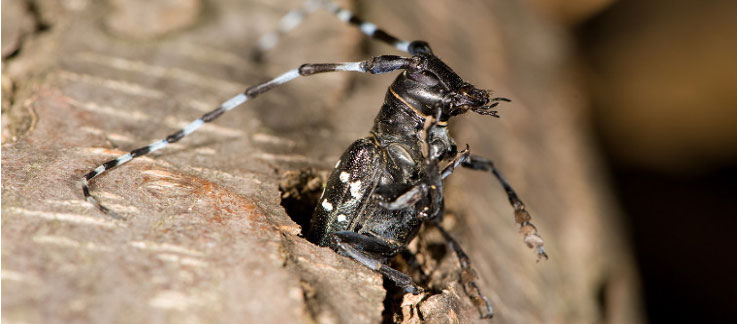

In [125]:
folder = "data/train_yes"

onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

print("Working with {0} images".format(len(onlyfiles)))
print("Image examples: ")

for i in range(1, 3):
    print(onlyfiles[i])
    display(_Imgdis(filename=folder + "/" + onlyfiles[i], width=512, height=512))

In [131]:
#debug info
print(train_files)
print(onlyfiles)

['1_AB001.jpg', '1_AB001r.jpg', '1_AB002.jpg', '1_AB003.jpg', '1_AB004.jpg', '1_AB005.jpg']
['1_AB001.jpg', '1_AB001r.jpg', '1_AB002.jpg', '1_AB003.jpg', '1_AB004.jpg', '1_AB005.jpg']


In [141]:
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

train_files = []
y_train = []
for _file in onlyfiles:
    train_files.append(_file)
    y_train.append(int(_file[0]))

#Clean up some shapes    
v_size = len(train_files)
y_train_vector = (np.array (y_train)).reshape(1,v_size) 
print("Files in train_files: %d" % v_size)

dataset = np.ndarray(shape=(v_size, 512*512*3), dtype=np.float32)

i = 0
for _file in train_files:
    img = load_img(folder + "/" + _file)  # this is a PIL image
    
    resize_img = scipy.misc.imresize(img, size=(512,512))
    x_ar = img_to_array(resize_img)
    flat_image = x_ar.reshape(1, 512*512*3)
    
    #print (flat_image.shape)
    
    dataset[i] = flat_image
    i += 1
    
dataset = dataset.T    
print("All images to array!")
print ("dataset shape = " + str (dataset.shape))
print ("y_train_vector shape = " + str (y_train_vector.shape))


Files in train_files: 6
All images to array!
dataset shape = (786432, 6)
y_train_vector shape = (1, 6)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


In [137]:
print (dataset.shape)
print (y_train_vector)
print (y_train_vector.shape)



(6, 786432)
[[1 1 1 1 1 1]]
(1, 6)


In [ ]:
#backup
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

train_files = []
y_train = []
#i=0
for _file in onlyfiles:
    train_files.append(_file)
    #label_in_file = _file.find("_")
    #y_train.append(int(_file[0:label_in_file]))
    y_train.append(int(_file[0]))

#Clean up some shapes    
v_size = len(train_files)
y_train_vector = np.array (y_train)    
print("Files in train_files: %d" % v_size)

# Original Dimensions
#image_width = 640
#image_height = 480
#ratio = 4

#image_width = int(image_width / ratio)
#image_height = int(image_height / ratio)

#channels = 3
#nb_classes = 1

#dataset = np.ndarray(shape=(len(train_files), channels, image_height, image_width), dtype=np.float32)
#dataset = np.ndarray(shape=(512*512*3,len(train_files)), dtype=np.float32)
dataset = np.ndarray(shape=(v_size, 512*512*3), dtype=np.float32)

#print (dataset.shape)

i = 0
for _file in train_files:
    img = load_img(folder + "/" + _file)  # this is a PIL image
    
    #img.thumbnail((image_width, image_height))
    
    # Convert to Numpy Array
    
    resize_img = scipy.misc.imresize(img, size=(512,512))
    x_ar = img_to_array(resize_img)
    flat_image = x_ar.reshape(1, 512*512*3)
    #print (x.shape)
    print (flat_image.shape)
    
    #x = x.reshape((3, 120, 160))
    # Normalize
    #x = (x - 128.0) / 128.0
    dataset[i] = flat_image
    i += 1
    #if i % 250 == 0:
    #    print("%d images to array" % i)
print("All images to array!")


In [32]:
str1 = "_this is string example....wow!!!";
str2 = "exam";

print (str1.find(str2))
print (str1.find(str2, 16))
print (str1.find(str2, 40))

16
16
-1


In [33]:
label_in_file = str1.find("_")
print (label_in_file)
#print(str1[0:label_in_file])

0


In [39]:
print (str1[1])

t


In [46]:
print (y_train)

[1, 1, 1, 1, 1, 1]


In [77]:
import h5py
train_dataset = h5py.File('train_catvnoncat.h5', "r")
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

In [89]:
print(list(train_dataset.keys()))
print (train_dataset["list_classes"][:])

['list_classes', 'train_set_x', 'train_set_y']
[b'non-cat' b'cat']


In [80]:
print (train_set_x_orig)

[[[[ 17  31  56]
   [ 22  33  59]
   [ 25  35  62]
   ...
   [  1  28  57]
   [  1  26  56]
   [  1  22  51]]

  [[ 25  36  62]
   [ 28  38  64]
   [ 30  40  67]
   ...
   [  1  27  56]
   [  1  25  55]
   [  2  21  51]]

  [[ 32  40  67]
   [ 34  42  69]
   [ 35  42  70]
   ...
   [  1  25  55]
   [  0  24  54]
   [  1  21  51]]

  ...

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]]


 [[[196 192 190]
   [193 186 182]
   [188 179 174]
   ...
   [ 90 142 200]
   [ 90 142 201]
   [ 90 142 201]]

  [[230 229 229]
   [204 199 197]
   [193 186 181]
   ...
   [ 91 143 201]
   [ 91 143 201]
   [ 91 143 201]]

  [[232 225 224]
   [235 234 234]
   [208 205 202]
   ...
   [ 91 144 202]
   [ 91 144 202]
   [ 92 144

In [91]:
xx = np.array([(1, 2), (3, 4)])

In [98]:
print (xx)
print (xx[0])

[[1 2]
 [3 4]]
[1 2]


In [144]:
import tensorflow as tf
sess = tf.InteractiveSession()

y = 0
yyy = tf.argmax(y,1)
yyy.eval()

InvalidArgumentError: Expected dimension in the range [0, 0), but got 1
	 [[Node: ArgMax_1 = ArgMax[T=DT_INT32, Tidx=DT_INT32, output_type=DT_INT64, _device="/job:localhost/replica:0/task:0/device:CPU:0"](ArgMax_1/input, ArgMax_1/dimension)]]

Caused by op 'ArgMax_1', defined at:
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "C:\ProgramData\Anaconda3\lib\asyncio\base_events.py", line 422, in run_forever
    self._run_once()
  File "C:\ProgramData\Anaconda3\lib\asyncio\base_events.py", line 1432, in _run_once
    handle._run()
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 117, in _handle_events
    handler_func(fileobj, events)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "C:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-144-7d2afc57d204>", line 5, in <module>
    yyy = tf.argmax(y,1)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py", line 432, in new_func
    return func(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_ops.py", line 220, in argmax
    return gen_math_ops.arg_max(input, axis, name=name, output_type=output_type)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_math_ops.py", line 819, in arg_max
    name=name)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3392, in create_op
    op_def=op_def)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1718, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Expected dimension in the range [0, 0), but got 1
	 [[Node: ArgMax_1 = ArgMax[T=DT_INT32, Tidx=DT_INT32, output_type=DT_INT64, _device="/job:localhost/replica:0/task:0/device:CPU:0"](ArgMax_1/input, ArgMax_1/dimension)]]
